In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import rotate
from scipy.ndimage import zoom
from scipy.ndimage import shift
import random



In [83]:
file_path = 'mnist_train.csv'  # Remplacez ceci par le chemin de votre fichier CSV
df = pd.read_csv(file_path)

In [268]:
labels = df.iloc[:, 0]  # Première colonne
images = df.iloc[:, 1:]  # Toutes les colonnes sauf la première
new_images = images.copy()
# Afficher une image d'exemple (par exemple, la première image)
for index, row in images.iterrows():
    image_data = row.values  # Obtenir les pixels de l'image (ligne complète sauf le label)
    # Reshape l'image si elle est en format 1D (par exemple, pour MNIST, elle est de taille 28x28)
    image = image_data.reshape(28, 28)
    angle_random = random.gauss(0, 30)
    rotated_image = rotate(image, angle_random, reshape=False, mode='nearest')
    
    zoom_random = random.gauss(1,0.1)
    #zoomed_image = zoom(rotated_image, zoom_random)[0:28, 0:28]
    zoomed_image = rotated_image
    offset_x_random = random.gauss(0,3)
    offset_y_random = random.gauss(0,3)
    shifted_image = shift(zoomed_image, shift=(offset_y_random, offset_x_random), mode='nearest')
    shifted_image_int = np.round(shifted_image).astype(int)
    ligne = shifted_image_int.reshape(-1)
    new_images.loc[index] = ligne


final_df = pd.concat([labels, new_images], axis=1)
final_df.to_csv('images_with_labels.csv', index=False)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


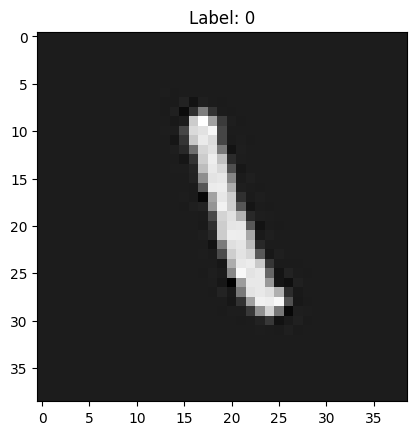

In [250]:
rotated_image = rotate(image, 50, reshape=True, mode='nearest')
print(rotated_image)
plt.imshow(rotated_image, cmap='gray')
plt.title(f"Label: {labels.iloc[0]}")  # Afficher le label de l'image
plt.show()

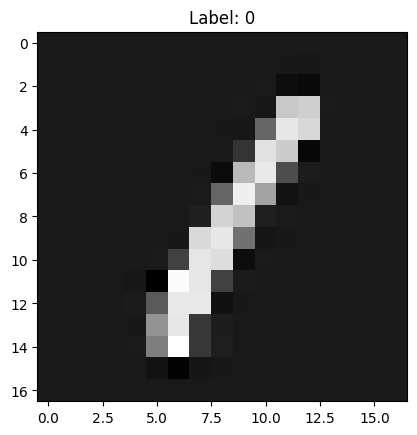

In [266]:
zoomed_image = zoom(image, 0.6)[0:28, 0:28]
plt.imshow(zoomed_image, cmap='gray')
plt.title(f"Label: {labels.iloc[0]}")  # Afficher le label de l'image
plt.show()

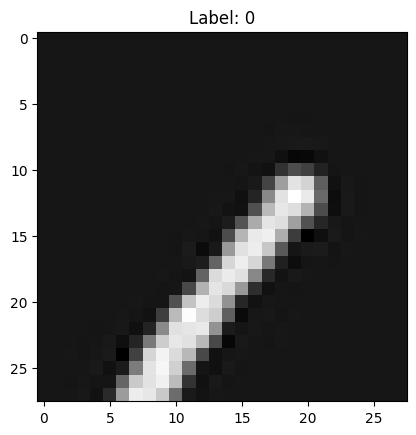

In [252]:
angle_random = random.gauss(0, 30)
rotated_image = rotate(image, angle_random, reshape=False, mode='nearest')
zoom_random = random.gauss(1,0.1)
zoomed_image = zoom(rotated_image, zoom_random)[0:28, 0:28]
offset_x_random = random.gauss(0,3)
offset_y_random = random.gauss(0,3)
shifted_image = shift(zoomed_image, shift=(offset_y_random, offset_x_random), mode='nearest')
plt.imshow(shifted_image, cmap='gray')
plt.title(f"Label: {labels.iloc[0]}")  # Afficher le label de l'image
plt.show()
